In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy.stats as sstat
from mpmath import mp
import math

from tensorflow_probability.substrates import numpy as tfp
tfd = tfp.distributions

In [74]:
y_obs = tfp.distributions.Normal(34,5).sample(1000)
n=1000

In [75]:
def lik(mu,n,y):
  med = 1/n*np.sum(y)
  yyy = []
  ssum = np.sum(yyy)
  for j in range(len(y)):
    yyy.append((y[j]-med)**2)
  res = math.e**(-1/50*(n*(mu-med)**2 + ssum))
  return res

In [76]:
mu0 = 33
def pi0(mu):
  ris2 = tfd.Normal(mu0,2).prob(mu)
  return ris2

In [77]:
#def proposal(x,x1):
 # return tfp.distributions.Exponential(-1/2*(abs(x-x1)**2)).sample()

In [78]:
##MAXIMAL COUPLING OF Q
def maximal_coupling(x,y):
      current_x = x
      current_y = y  
      proposed_x = current_x + tfd.Normal(0, 1).sample()
      pX = sstat.norm.pdf(proposed_x,current_x,1)
      w = tfd.Uniform(0,1).sample()*pX
      qX = sstat.norm.pdf(proposed_x,current_y,1)
      if w < qX:
          x_new = proposed_x
          y_new = proposed_x
      else:
          t = True
          while t == True:
                proposed_y = current_y + tfd.Normal(0, 1).sample()
                qY =  sstat.norm.pdf(proposed_y,current_y,1) 
                w =  tfd.Uniform(0,1).sample()*qY
                pY = sstat.norm.pdf(proposed_y,current_x,1)
                if w > pY :
                  t= False

          x_new = proposed_x
          y_new = proposed_y  


      return [x_new, y_new]


In [83]:
### METROPOLIS HASTINGS

it=1000
##Target distribution: posterior proportional to lik*pi
def target(mu):
  return lik(mu,n,y_obs)*pi0(mu)



def metropolis_hastings(x_0,y_0):   
  #XX = []
  #XX.append([x_0,y_0])
  XXX=[]
  YYY=[] 
  x_old = x_0
  y_old = y_0
  for i in range(it):     
           new_states = maximal_coupling(x_old,y_old)
           x_can = new_states[0]
           u = tfd.Uniform(0,1).sample()
           xprob =  min([1.,target(x_can)/(target(x_old))]) 
           if u < xprob :
               x_new = x_can
           else: 
               x_new= x_old
           y_can = new_states[1]
           yprob =  min([1.,target(y_can)/target(y_old)]) 
           if u < yprob :
                y_new =y_can
           else: 
                y_new= y_old
      
           #XX.append([x_new,y_new])
           XXX.append(x_new)
           YYY.append(y_new)
           x_old=x_new
           y_old=y_new
           
  return XXX,YYY #XX

(array([  2.,   0.,   9.,  47.,  85., 114., 175., 187., 144., 137.,  62.,
         28.,   2.,   5.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   3.]),
 array([33.57186787, 33.64726808, 33.72266829, 33.7980685 , 33.87346871,
        33.94886892, 34.02426912, 34.09966933, 34.17506954, 34.25046975,
        34.32586996, 34.40127017, 34.47667038, 34.55207059, 34.6274708 ,
        34.70287101, 34.77827122, 34.85367143, 34.92907164, 35.00447185,
        35.07987206, 35.15527227, 35.23067248, 35.30607269, 35.38147289,
        35.4568731 , 35.53227331, 35.60767352, 35.68307373, 35.75847394,
        35.83387415]),
 <a list of 30 Patch objects>)

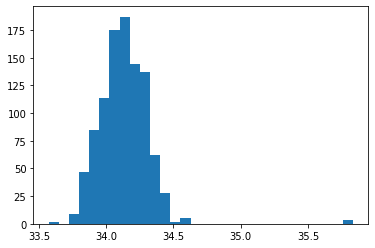

In [84]:
prova = metropolis_hastings(36,33)
plt.hist(prova[0], bins=30)